# Ejercicio 2 - guía 9

Repetir el ejercicio anterior pero asumiendo que el prior viene dado por una uniforme en [0, 0.5]
con peso 0.3 y otra uniforme en [0.5, 1] con peso 0.7.

### Desarrollo

Primero armo el modelo:

In [1]:
import pymc as pm

with pm.Model() as model:
    
    # Defino el prior mixto
    theta = pm.Mixture(
        'theta',
        w=[0.3, 0.7],  
        comp_dists=[
            pm.Uniform.dist(lower=0, upper=0.5),
            pm.Uniform.dist(lower=0.5, upper=1)  
        ]
    )
    
    # Likelihood
    y = pm.Binomial('observacion', n=30, p=theta, observed= 19)
    
    # Tomo la traza de la posterior
    traza = pm.sample(10000, tune=1000, return_inferencedata=True, random_seed=42)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\gerar\OneDrive\Documentos\Mis Archivos\Estadistica e Inferencia\estat_inferencia\Lib\site-packages\pymc\distributions\mixture.py:477: MixtureTransformWarning: No safe default transform found for Mixture distribution theta. This can happen when components have different supports or default transforms.
If appropriate, you can specify a custom transform for more efficient sampling.
  transform_warning()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


c:\Users\gerar\OneDrive\Documentos\Mis Archivos\Estadistica e 
Inferencia\estat_inferencia\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 29 seconds.
There were 56 divergences after tuning. Increase `target_accept` or reparameterize.


Con la traza obtenida grafico la posterior:

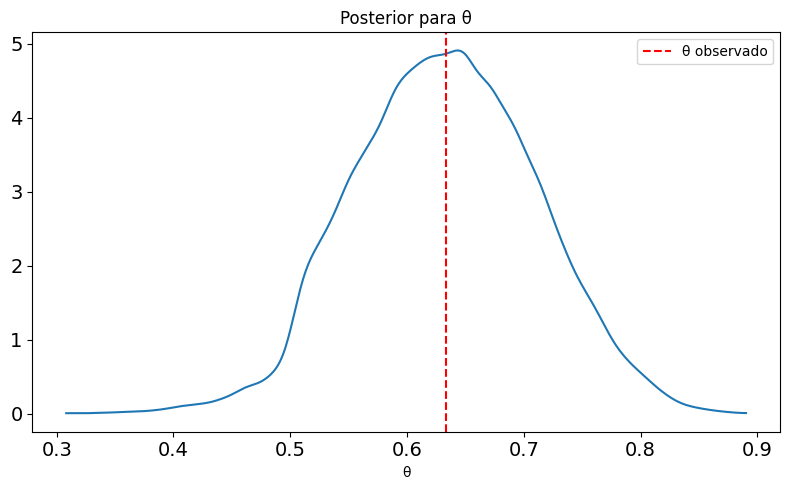

In [2]:
import matplotlib.pyplot as plt
import arviz as az

plt.figure(figsize=(8, 5))
az.plot_dist(traza.posterior["theta"])
plt.axvline(19/30, color='red', linestyle='--', label='θ observado')
plt.title('Posterior para θ')
plt.xlabel('θ')
plt.legend()
plt.tight_layout()
plt.show()

Y ahora miro cúal es su **90% HPDI**:

In [3]:
with model:
    hpdi_90 = pm.hdi(traza, hdi_prob=0.90)
    
print("90% HPDI para θ:", hpdi_90["theta"].values)

90% HPDI para θ: [0.50574979 0.75406134]


Calculo la probabilidad para cada k de los 10 experimentos:

In [4]:
from scipy.stats import binom
import numpy as np

exps_post_predictive = binom.rvs(n = 10, p = traza.posterior['theta'].values[0], size = 10000)

for i in range(10 + 1):
    print(f'P(y = {i}): {np.mean(exps_post_predictive == i)}')

P(y = 0): 0.0001
P(y = 1): 0.0023
P(y = 2): 0.0128
P(y = 3): 0.0395
P(y = 4): 0.0888
P(y = 5): 0.1661
P(y = 6): 0.2185
P(y = 7): 0.2205
P(y = 8): 0.155
P(y = 9): 0.0774
P(y = 10): 0.019
